In [2]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/Amazon Sale Report.csv'
data = pd.read_csv(file_path)

# Remove unnecessary columns
data_cleaned = data.drop(columns=['index', 'New', 'PendingS'])

# Drop rows with missing Amount values
data_cleaned = data_cleaned.dropna(subset=['Amount'])

# Fill missing shipping details with mode
for col in ['ship-city', 'ship-state', 'ship-postal-code', 'ship-country']:
    data_cleaned[col].fillna(data_cleaned[col].mode()[0], inplace=True)

# Drop 'fulfilled-by' column
data_cleaned = data_cleaned.drop(columns=['fulfilled-by'])

# Convert data types
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], errors='coerce')
data_cleaned['Qty'] = pd.to_numeric(data_cleaned['Qty'], errors='coerce')
data_cleaned['Amount'] = pd.to_numeric(data_cleaned['Amount'], errors='coerce')

# Remove duplicates
data_cleaned = data_cleaned.drop_duplicates()

# Check the cleaned dataset
data_cleaned.info()

<ipython-input-2-67397fdb114e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned[col].fillna(data_cleaned[col].mode()[0], inplace=True)
<ipython-input-2-67397fdb114e>:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], errors='coerce')


<class 'pandas.core.frame.DataFrame'>
Index: 120454 entries, 0 to 128975
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            120454 non-null  object        
 1   Date                120454 non-null  datetime64[ns]
 2   Status              120454 non-null  object        
 3   Fulfilment          120454 non-null  object        
 4   Sales Channel       120454 non-null  object        
 5   ship-service-level  120454 non-null  object        
 6   Category            120454 non-null  object        
 7   Size                120454 non-null  object        
 8   Courier Status      120454 non-null  object        
 9   Qty                 120454 non-null  int64         
 10  currency            120454 non-null  object        
 11  Amount              120454 non-null  float64       
 12  ship-city           120454 non-null  object        
 13  ship-state          120454 non-nul

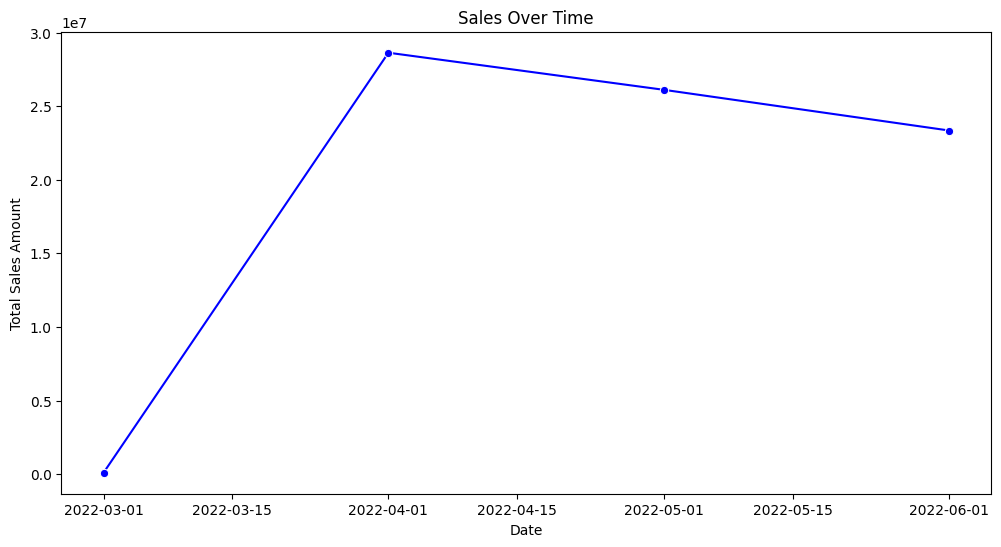

In [15]:
# Sales over time
sales_over_time = data_cleaned.groupby(data_cleaned['Date'].dt.to_period('M')).agg({'Amount': 'sum'}).reset_index()
sales_over_time['Date'] = sales_over_time['Date'].dt.to_timestamp()

# Plot sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_over_time, x='Date', y='Amount', marker='o', color='b')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.show()

<ipython-input-16-01b75abcbc37>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




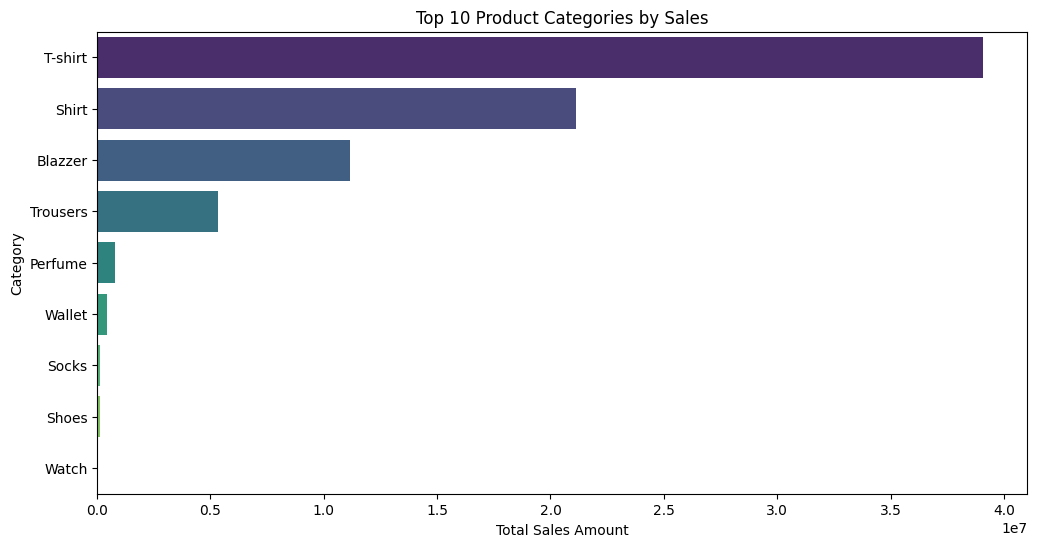

<ipython-input-16-01b75abcbc37>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




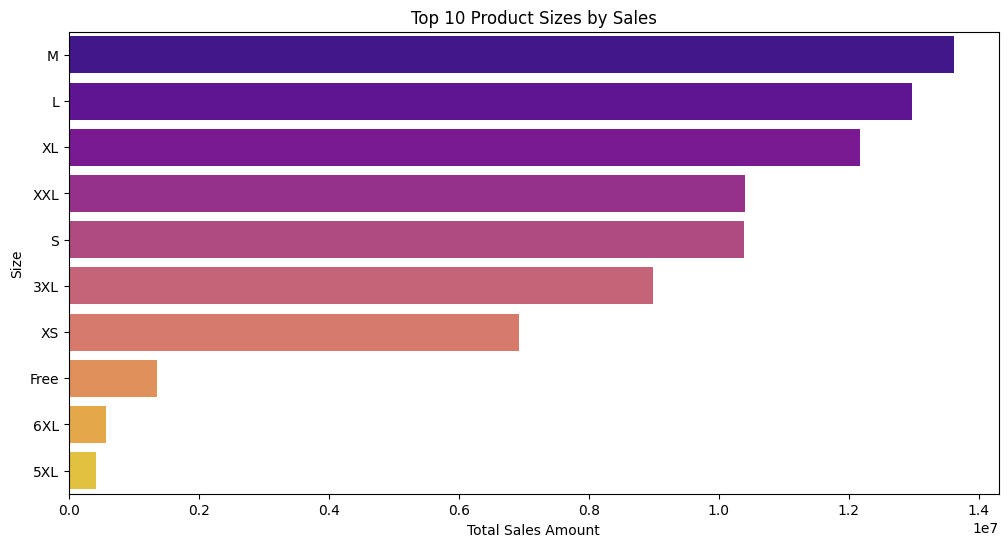

In [16]:

# Product Category Analysis
category_sales = data_cleaned.groupby('Category').agg({'Amount': 'sum', 'Qty': 'sum'}).sort_values(by='Amount', ascending=False).reset_index()

# Plot top 10 product categories by sales
plt.figure(figsize=(12, 6))
sns.barplot(data=category_sales.head(10), x='Amount', y='Category', palette='viridis')
plt.title('Top 10 Product Categories by Sales')
plt.xlabel('Total Sales Amount')
plt.ylabel('Category')
plt.show()

# Product Size Analysis
size_sales = data_cleaned.groupby('Size').agg({'Amount': 'sum', 'Qty': 'sum'}).sort_values(by='Amount', ascending=False).reset_index()

# Plot top 10 product sizes by sales
plt.figure(figsize=(12, 6))
sns.barplot(data=size_sales.head(10), x='Amount', y='Size', palette='plasma')
plt.title('Top 10 Product Sizes by Sales')
plt.xlabel('Total Sales Amount')
plt.ylabel('Size')
plt.show()

<ipython-input-17-0550aa2ef13d>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




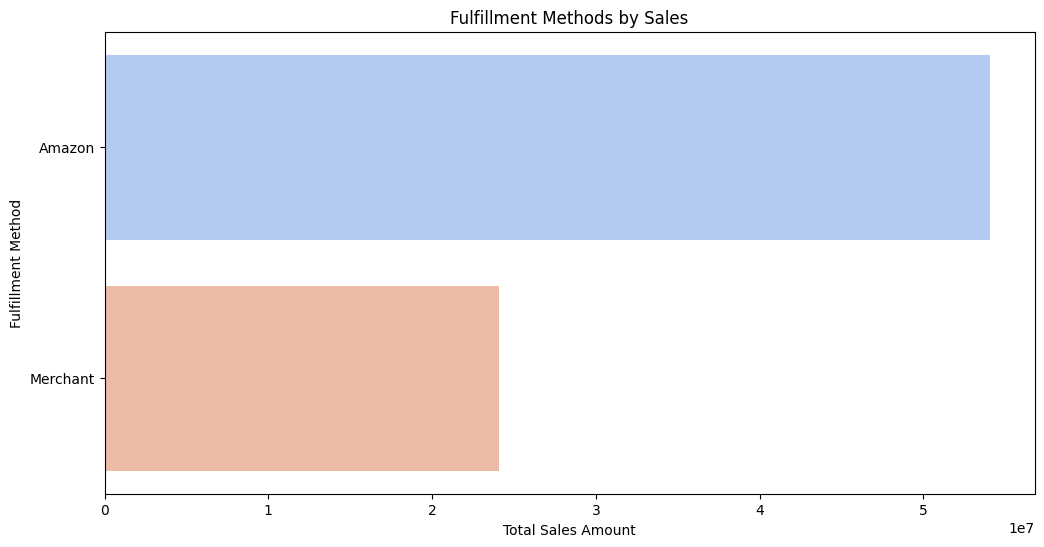

In [17]:

# Fulfillment Method Analysis
fulfillment_sales = data_cleaned.groupby('Fulfilment').agg({'Amount': 'sum', 'Qty': 'sum'}).reset_index()

# Plot fulfillment methods by sales
plt.figure(figsize=(12, 6))
sns.barplot(data=fulfillment_sales, x='Amount', y='Fulfilment', palette='coolwarm')
plt.title('Fulfillment Methods by Sales')
plt.xlabel('Total Sales Amount')
plt.ylabel('Fulfillment Method')
plt.show()

<ipython-input-18-28c855d67854>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




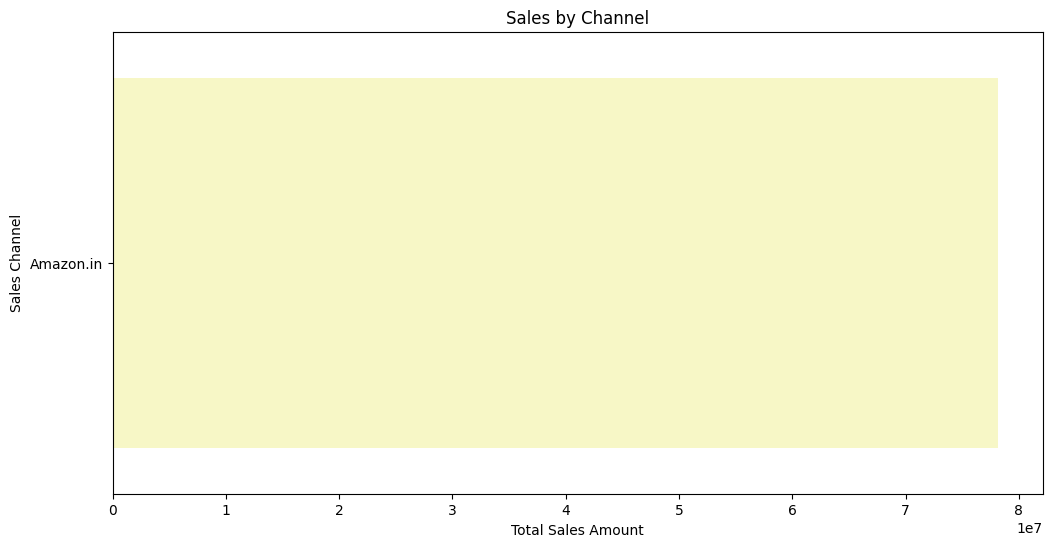

In [18]:

# Customer Segmentation by Sales Channel
channel_sales = data_cleaned.groupby('Sales Channel').agg({'Amount': 'sum', 'Qty': 'sum'}).reset_index()

# Plot sales by channel
plt.figure(figsize=(12, 6))
sns.barplot(data=channel_sales, x='Amount', y='Sales Channel', palette='Spectral')
plt.title('Sales by Channel')
plt.xlabel('Total Sales Amount')
plt.ylabel('Sales Channel')
plt.show()

<ipython-input-19-1543ecb97713>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




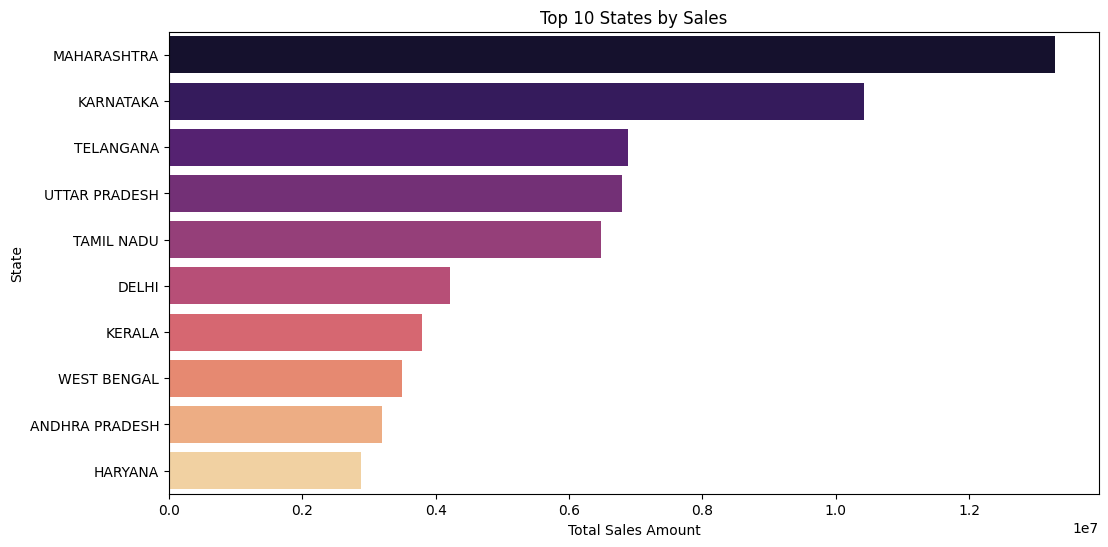

<ipython-input-19-1543ecb97713>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




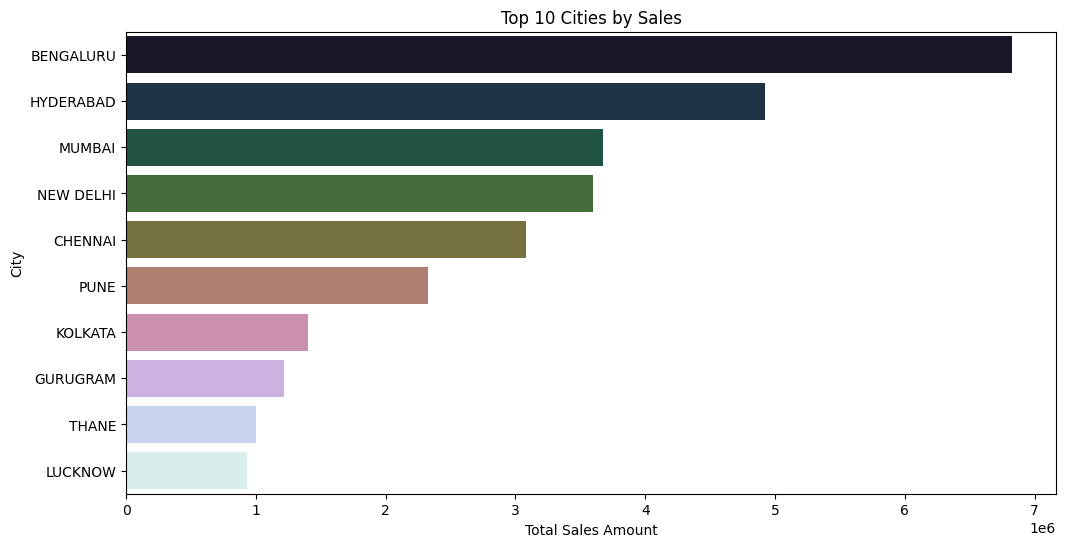

In [19]:

# Sales by State
state_sales = data_cleaned.groupby('ship-state').agg({'Amount': 'sum', 'Qty': 'sum'}).sort_values(by='Amount', ascending=False).reset_index()

# Plot top 10 states by sales
plt.figure(figsize=(12, 6))
sns.barplot(data=state_sales.head(10), x='Amount', y='ship-state', palette='magma')
plt.title('Top 10 States by Sales')
plt.xlabel('Total Sales Amount')
plt.ylabel('State')
plt.show()

# Sales by City
city_sales = data_cleaned.groupby('ship-city').agg({'Amount': 'sum', 'Qty': 'sum'}).sort_values(by='Amount', ascending=False).reset_index()

# Plot top 10 cities by sales
plt.figure(figsize=(12, 6))
sns.barplot(data=city_sales.head(10), x='Amount', y='ship-city', palette='cubehelix')
plt.title('Top 10 Cities by Sales')
plt.xlabel('Total Sales Amount')
plt.ylabel('City')
plt.show()